### Import packages and read data
These packages are required for data analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from IPython.display import display

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
raw_X_train = pd.read_csv('./kaggle/train.csv')
raw_X_test = pd.read_csv('./kaggle/test.csv')

### Dataset overview
At first, we should get summary inforamation about the dataset including column names and column dtype, wehther or not there are missing data in the dataset.

In [3]:
# raw_X_train.info()

In [4]:
raw_X_train.set_index('Id', inplace=True)
raw_X_test.set_index('Id', inplace=True)

### Understanding Data
There are 2 types of data in our dataset: 
1. For categorial type of data, we can leverage boxplot to explore data distribution.
2. For numeric type of data, we can use scatterplot to show the data distribution, and use heatmap to explore the relationship between variables.


In [5]:
s=(raw_X_train.dtypes=='object')
cat_columns = list(s[s].index)

raw_X_train[cat_columns].nunique()

MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64

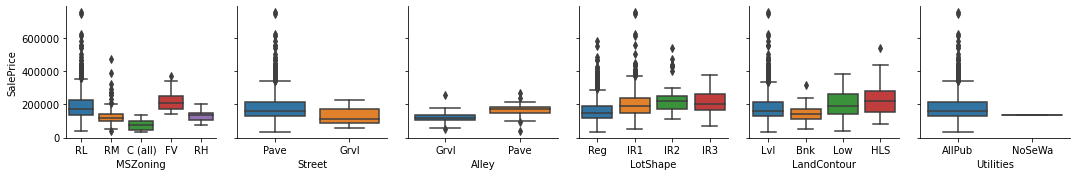

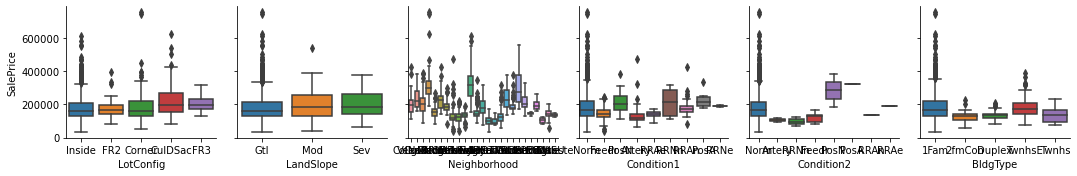

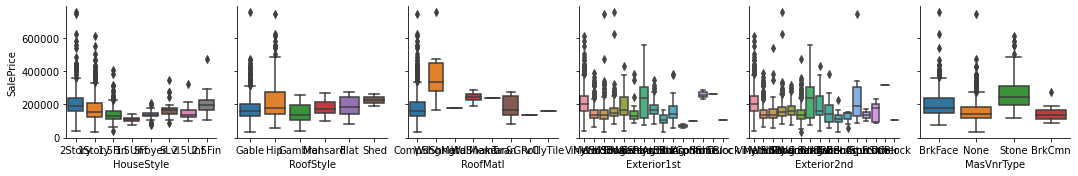

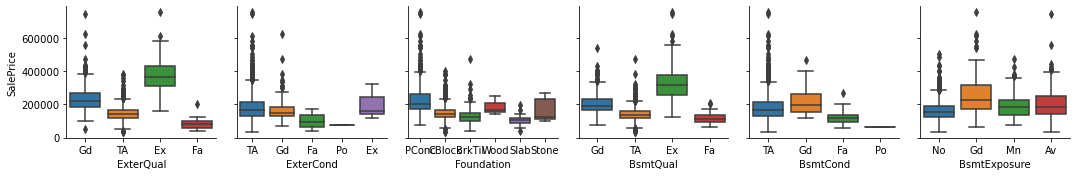

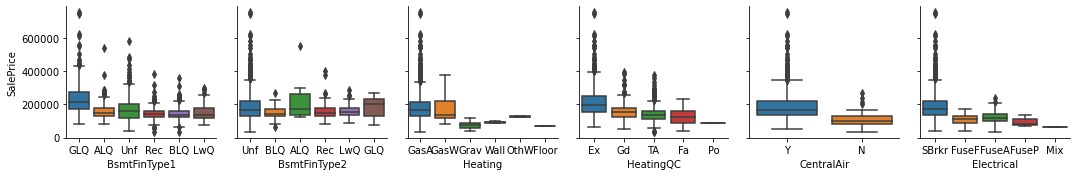

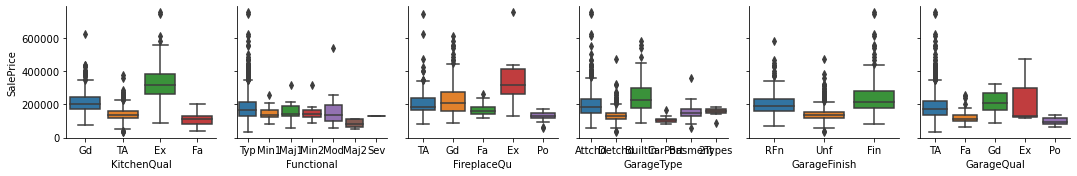

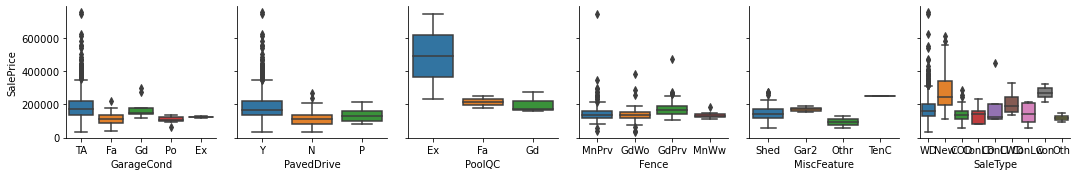

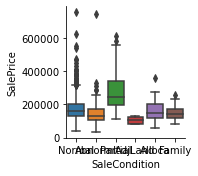

In [6]:
for i in range(0,len(cat_columns),6):
    g = sns.PairGrid(raw_X_train, y_vars=["SalePrice"], x_vars=cat_columns[i:i+6], dropna=True)
    g.map(sns.boxplot)

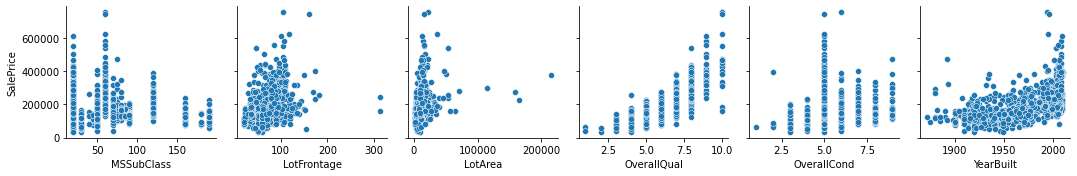

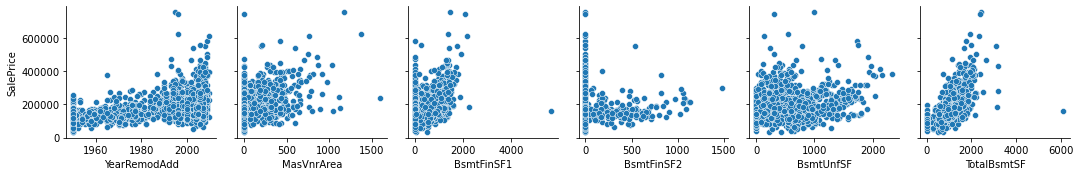

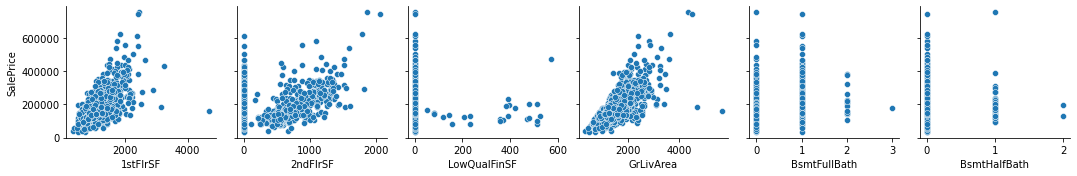

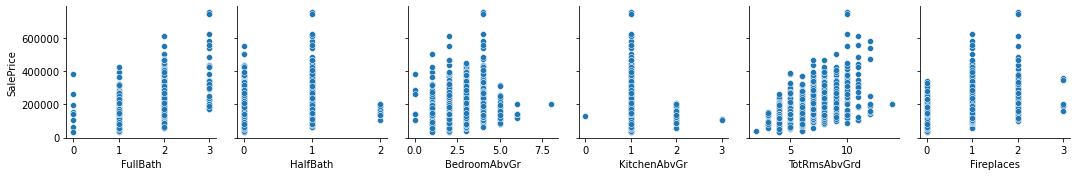

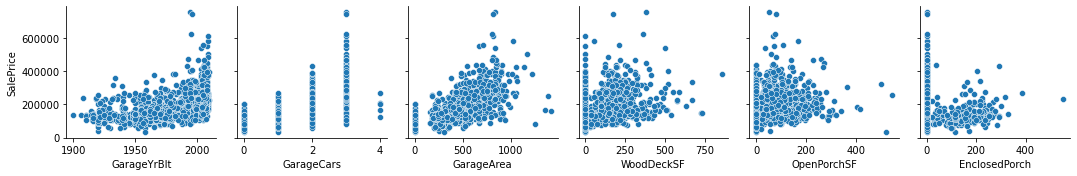

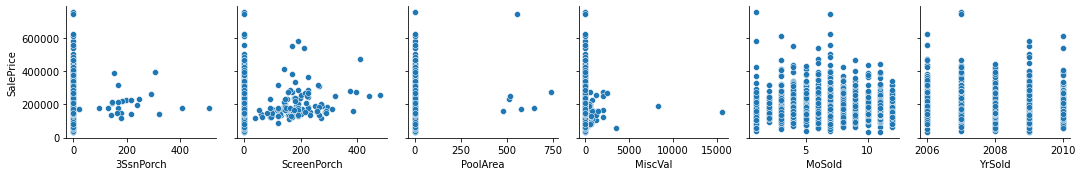

In [7]:
s = (raw_X_train.dtypes!='object')
num_columns = list(s[s].index)[:-1]

for i in range(0,len(num_columns),6):
    g = sns.PairGrid(raw_X_train, y_vars=["SalePrice"], x_vars=num_columns[i:i+6], dropna=True)
    g.map(sns.scatterplot)

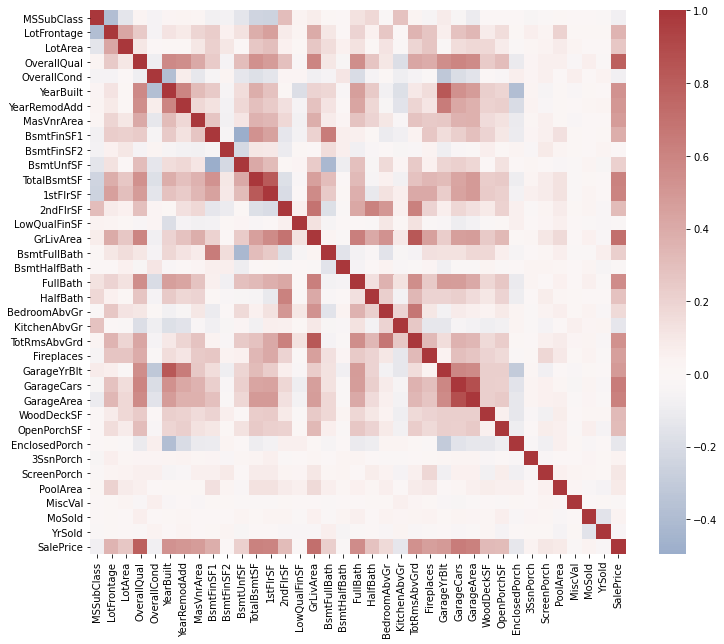

In [8]:
corr = raw_X_train.corr()
f, ax = plt.subplots(figsize=(12, 10))
g = sns.heatmap(corr,ax=ax,center=0,cmap="vlag")

### Separating the target from the train set and working on dataset copies

In [9]:
X_train = raw_X_train.copy()
X_test = raw_X_test.copy()

y_train = X_train.SalePrice.copy()
X_train.drop(['SalePrice'], axis=1, inplace=True)

In [10]:
all_data = pd.concat([X_train, X_test], axis=0, copy=False)

### Dealing with outlier data
From the above scatterplot diagram of TotalMsmtSF-SalePrice and GrLivArea-SalePrice, we can see that there are some points that are far away from the others. Can we consider them as outlier and remove the rows with these kind of values from our training dataset?

Let's take a look at the dataset before we make decision.

In [11]:
raw_X_train.query(('GrLivArea>4000 & SalePrice<200000 | TotalBsmtSF>6000'))

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


I don't think above rows are outlier, so I will keep them in our trainning set. 

The following code snippet can be used to remove thses rows that contain outlier values. 
```
index_to_drop = raw_X_train[(raw_X_train['GrLivArea']>4000) & \
                            (raw_X_train['SalePrice']<200000) | \
                            (raw_X_train['TotalBsmtSF']>6000)\
                           ].index
all_data.drop(index=index_to_drop, inplace=True)
y_train.drop(labels=index_to_drop, axis=0, inplace=True)
```

### Dealing with missing values
We can see there are some columns with missing values from the above info. Firstly our strategy to deal with the missing values is to drop these columns that have more than half missing values.

In [12]:
## the test results show that keeping thses columns will be better

# sum_missing = all_data.isnull().sum().sort_values(ascending=False)
# columns_to_drop = list(sum_missing[sum_missing > (len(X_train) / 2)].index)

# all_data.drop(columns_to_drop, axis=1,inplace=True)
# print("droped columns: ", columns_to_drop)

### Dealing with correlated variables
Generally we should remove the following variables:
1. The variables that have no contribution to our prediction.
2. The variables among which there are obvious correlationship, we will keep just the primary one.
3. Furthermore, there is BsmtFinSF1 + BsmtFinSF2 + BsmtUnfSF = TotalBsmtSF, so columns of BsmtFinSF2 and BsmtUnfSF can be droped. 

In [13]:
## the test results show that keeping thses columns will be better

# columns_to_drop = ['BsmtFinSF2','BsmtUnfSF']
# corr_abs = raw_X_train.corr().abs()

# columns_to_drop += list(corr_abs.SalePrice[corr_abs.SalePrice<0.02].index)
# sorted_pair = (corr_abs.where(np.triu(np.ones(corr_abs.shape), k=1).astype(np.bool))
#                   .stack()
#                   .sort_values(ascending=False))
# columns_to_drop += [col[0] for col in list(sorted_pair[sorted_pair>0.85].index)]

# all_data.drop(columns=columns_to_drop, axis=1, inplace=True)

# print("droped columns: ", columns_to_drop)

### Filling missing value
There are some ways to handle the missing values:
1. The easy way is doing nothing and letting the algorithm handle the missing data, or just drop the rows or columns with missing values.
2. Imputation Using (Constant/Mean/Median/Most-Frequent) Values.
3. Imputation Using k-NN or other ML algorithm

As test, following the above method 2 to handle the missing data, and using simple OrdinalEncoder to enode categorcal columns, and using XGB to create a model, the prediction result looks good.

In [14]:
# all_data = all_data.apply(lambda x: x.fillna(value='Unknow') if x.dtype.name == 'object' else x.fillna(value=-1), axis=0)
# all_data = all_data.apply(lambda x: x.fillna(value='Unknow') if x.dtype.name == 'object' else x.fillna(x.value_counts().index[0]), axis=0)

# from sklearn.preprocessing import OrdinalEncoder
# ordinal_encoder = OrdinalEncoder()
# s=(all_data.dtypes=='object')
# cat_columns = list(s[s].index)
# all_data[cat_columns] = pd.DataFrame(ordinal_encoder.fit_transform(all_data[cat_columns]), columns=cat_columns, index=all_data.index)

This indiscriminate treatment of missing values is not the best way, but I will deal with it in more detail here.

In [15]:
s=(all_data.dtypes=='object')
cat_columns = list(s[s].index)
s=(all_data.dtypes!='object')
num_columns = list(s[s].index)
s = all_data.isnull().any()
columns_with_missing = list(s[s].index)

cat_columns_with_missing = [c for c in columns_with_missing if c in cat_columns]
num_columns_with_missing = [c for c in columns_with_missing if c in num_columns]

all_data = all_data.apply(lambda x:  x.fillna(value='NA') if x.dtype.name == 'object' else x.fillna(x.mean()) if x.name in ['LotFrontage', 'GarageYrBlt'] else x.fillna(value=0), axis=0)

In [16]:
ordinal_mapping = {'LotShape'     : {'IR3':1,'IR2':2,'IR1':3,'Reg':4},
                   'ExterQual'    : {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
                   'ExterCond'    : {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
                   'BsmtQual'     : {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
                   'BsmtCond'     : {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
                   'BsmtExposure' : {'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4},
                   'BsmtFinType1' : {'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6},
                   'BsmtFinType2' : {'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6},
                   'HeatingQC'    : {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
                   'CentralAir'   : {'N': 1, 'Y': 2},
                   'Electrical'   : {'Mix': 1, 'FuseP': 2, 'FuseF': 3, 'FuseA': 4, 'SBrkr': 5},
                   'KitchenQual'  : {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
                   'FireplaceQu'  : {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
                   'GarageFinish' : {'Unf': 1, 'RFn': 2, 'Fin': 3},
                   'GarageQual'   : {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
                   'GarageCond'   : {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
                   'PavedDrive'   : {'N': 1, 'P': 2, 'Y': 3},
                   'PoolQC'       : {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
                   'Fence'        : {'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}
                   }
for c in ordinal_mapping.keys():
    if c in cat_columns_with_missing:
        ordinal_mapping[c]['NA'] = 0
all_data.replace(ordinal_mapping, inplace=True)
ordinal_columns = list(ordinal_mapping.keys())

# extra_ordinal_columns = ['Neighborhood','Exterior1st','Exterior2nd']
# from sklearn.preprocessing import OrdinalEncoder
# ordinal_encoder = OrdinalEncoder()
# all_data[extra_ordinal_columns] = pd.DataFrame(ordinal_encoder.fit_transform(all_data[extra_ordinal_columns]), columns=extra_ordinal_columns, index=all_data.index)
# ordinal_columns += extra_ordinal_columns

onehot_columns = [c for c in cat_columns if c not in ordinal_columns]
all_data = pd.get_dummies(all_data, columns=onehot_columns, drop_first=True)

In [17]:
X_train = all_data.loc[:1460]
X_test = all_data.loc[1461:]

### Training models 

In [18]:
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

import scipy.stats as stats
from math import sqrt
rmse = lambda y, y_preds : sqrt(mean_squared_error(y, y_preds))

#### Tuning hyper parameters for model selection

In [19]:
def Tuning_hyper_parameters(estimator, tuned_parameters, cv=[(slice(None), slice(None))], scoring='neg_mean_squared_error'):
    print("# Tuning hyper-parameters")

    # parameters['learning_rate'] = stats.uniform(0, 1)
    # grid_search_search = RandomizedSearchCV((estimator, tuned_parameters, scoring=scoring, cv=[(slice(None), slice(None))], n_jobs=-1, verbose=True)
    # grid_search = GridSearchCV(estimator, tuned_parameters, scoring=scoring, cv=[(slice(None), slice(None))], n_jobs=-1, verbose=True)
    grid_search = GridSearchCV(estimator, tuned_parameters, scoring=scoring, cv=cv, n_jobs=-1, verbose=True)
    grid_search.fit(X_train, y_train)

    print("Best parameters set found:", grid_search.best_params_)
    print("Best score: ", grid_search.best_score_)
    print()
    print("Grid scores:")
    print()
    means = grid_search.cv_results_["mean_test_score"]
    stds = grid_search.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, grid_search.cv_results_["params"]):
        print("%0.6f (+/-%0.06f) for %r" % (mean, std * 2, params))
    print()

#### Working with ElasticNet

In [20]:
# enet = ElasticNet()
# parameters = {'alpha': [0.0005, 0.001, 0.05, 1.0],
#               'l1_ratio': [0.3, 0.5, 0.7],
#               'max_iter': [1000, 5000],
#               'normalize': [True],
#               'random_state': [0]
#              }
# Tuning_hyper_parameters(enet, parameters)

In [21]:
enet_model = ElasticNet(alpha=0.0005, l1_ratio=0.7, max_iter=1000, normalize=True, random_state=0)
enet_model.fit(X_train, y_train)
enet_preds = enet_model.predict(X_train)

print('rmse:', rmse(y_train, enet_preds))

enet_preds = enet_model.predict(X_test)

enet_submission = pd.DataFrame({'Id': X_test.index, 'SalePrice': enet_preds})
enet_submission.to_csv('enet-submission.csv',index=False)

rmse: 26693.660711785236


#### Working with XGBRegressor

In [22]:
# xgb_r = xgb.XGBRegressor()
# parameters = {'nthread':[4],
#               'eval_metric': ['rmse'],
#               'learning_rate': [0.25, 0.3, 0.35], 
#               'max_depth': [5,6,7],
#               'n_estimators': [2000,2200,2400]}
# Tuning_hyper_parameters(xgb_r, parameters)

In [23]:
xgb_model = XGBRegressor(n_estimators=2000, learning_rate=0.3, max_depth=6, eval_metric='rmse', random_state=0)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_train)

# last submission rmse = 0.04069060002551749
print('rmse:', rmse(y_train, xgb_preds))

xgb_preds = xgb_model.predict(X_test)

xgb_submission = pd.DataFrame({'Id': X_test.index, 'SalePrice': xgb_preds})
xgb_submission.to_csv('xgb-submission-v5.csv',index=False)

rmse: 0.04069060002551749


#### Working with GradientBoostingRegressor

In [24]:
# gbr = GradientBoostingRegressor()
# parameters = {'learning_rate': [0.05, 0.1, 0.15, 0.2], 
#               'n_estimators': [2000,2200]}
# Tuning_hyper_parameters(gbr, parameters, cv=5)

In [25]:
gbr_model = GradientBoostingRegressor(n_estimators=2200, learning_rate=0.1)
gbr_model.fit(X_train, y_train)

gbr_preds = gbr_model.predict(X_train)

print('rmse:', rmse(y_train, gbr_preds))
print('model score:', gbr_model.score(X_train, y_train))

#last submission with rmse=1004.5301067360377, model.score=0.9998400008622957
gbr_preds = gbr_model.predict(X_test)
gbr_submission = pd.DataFrame({'Id': X_test.index, 'SalePrice': gbr_preds})
gbr_submission.to_csv('gbr-submission.csv',index=False)

rmse: 1004.5301067360369
model score: 0.9998400008622957


For this case, Looks stacking can't get better result than GradientBoostingRegressor.

In [26]:
stacking_submission = pd.DataFrame({'Id': X_test.index, 'SalePrice': (xgb_preds + gbr_preds) / 2})
stacking_submission.to_csv('stacking-submission.csv',index=False)

### End Notes
Among these algorithms I tested here, GradientBoostingRegressor has the best prediction results. I also tested RandomForestRegressor, but the result was as expection as said in https://en.wikipedia.org/wiki/Ensemble_learning that: "In some cases, boosting has been shown to yield better accuracy than bagging, but it also tends to be more likely to over-fit the training data." 